In [2]:
from graphviz import Digraph
from IPython.display import Image, display, HTML
import base64

def visualize_tree(root):
    dot = Digraph()

    # 🧩 Graph-wide settings
    dot.graph_attr.update(
        size="8,6",
        dpi="96",
        rankdir="TB",
    )

    # 📌 Node appearance
    dot.node_attr.update(
        fontname="Arial",
        fontsize="12",
        width="0.5",
        height="0.5",
        fixedsize="true",
        style="filled"
    )

    def add_nodes_edges(node, parent=None, is_left=False):
        if node:
            node_id = str(id(node))

            # Node style
            if node == root:
                fillcolor = "lightgreen"
                shape = "circle"
            elif is_left:
                fillcolor = "lightblue"
                shape = "circle"
            else:
                fillcolor = "lightcoral"
                shape = "doublecircle"

            # Add the node with its data
            dot.node(node_id, str(node.data), fillcolor=fillcolor, shape=shape)

            # Add edge to parent if exists
            if parent:
                parent_id = str(id(parent))
                edge_color = "blue" if is_left else "red"
                label = "L" if is_left else "R"
                dot.edge(parent_id, node_id, color=edge_color, label=label)

            # Recurse for children
            add_nodes_edges(node.left, node, True)
            add_nodes_edges(node.right, node, False)

    # Build the tree
    add_nodes_edges(root)
    dot.format = 'png'

    # Render image to memory instead of file
    img_data = dot.pipe(format='png')
    encoded = base64.b64encode(img_data).decode('utf-8')

    # ✅ Display result in side-by-side layout
    html = f"""
    <div style="display: flex; align-items: flex-start; gap: 20px;">
        <div style="flex: 1;">
            <pre><code>
Tree Visualization Complete ✅
Root: {root.data if root else "None"}
            </code></pre>
        </div>
        <div style="flex: 1;">
            <img src="data:image/png;base64,{encoded}" alt="Tree Visualization">
        </div>
    </div>
    """
    display(HTML(html))

Inorder Traversal of the tree: 
2
5
6
7
8
10
12
15
20
30

Preorder Traversal of the tree: 
5
2
10
7
6
8
15
12
20
30

Postorder Traversal of the tree: 
2
6
8
7
12
30
20
15
10
5



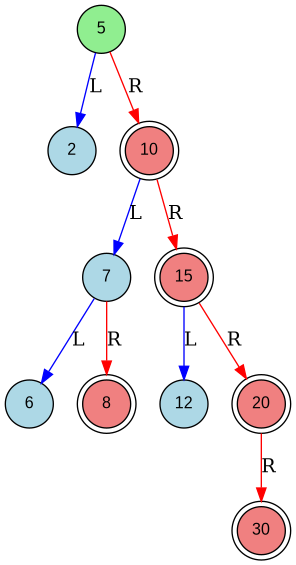

In [ ]:
# Binary Tree Node class
class Node:
    def __init__(self, value):
        self.left = None
        self.data = value
        self.right = None

class Tree:
    def createNode(self, data):
        return Node(data)

    def insert(self, node, data):
        if node is None:
            return self.createNode(data)
        if data < node.data:
            node.left = self.insert(node.left, data)
        else:
            node.right = self.insert(node.right, data)
        return node

    def traverse_Inorder(self, root): #(L rt R)
        if root is not None:
            self.traverse_Inorder(root.left)
            print(root.data)
            self.traverse_Inorder(root.right)

    def traverse_Preorder(self, root):  #(rt L R)
        if root is not None:
            print(root.data)
            self.traverse_Preorder(root.left)
            self.traverse_Preorder(root.right)
            
    
    def traverse_Postorder(self, root):  #(L R rt)
        if root is not None:
            self.traverse_Postorder(root.left)
            self.traverse_Postorder(root.right)
            print(root.data)
                    
    

# --- Driver Code ---
tree = Tree()
root = tree.createNode(5)

# Inserting nodes
tree.insert(root, 2)
tree.insert(root, 10)
tree.insert(root, 7)
tree.insert(root, 15)
tree.insert(root, 12)
tree.insert(root, 20)
tree.insert(root, 30)
tree.insert(root, 6)
tree.insert(root, 8)

# Inorder Traversal
print("Inorder Traversal of the tree: ")
tree.traverse_Inorder(root)

print("\nPreorder Traversal of the tree: ")
tree.traverse_Preorder(root)

print("\nPostorder Traversal of the tree: ")
tree.traverse_Postorder(root)

# Visualize the tree
visualize_tree(root)


In [6]:
print("\nPostorder Traversal of the tree: ")
tree.traverse_Postorder(root)


Postorder Traversal of the tree: 
2
6
8
7
12
30
20
15
10
5
